# AI 정리 코드

In [53]:
# 기본 import

from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [54]:
# 데이터 불러오기 (csv, xlsx)

df = pd.read_csv("C:/ai/iris.data",header=None)
#df = pd.read_csv("C:/ai/breast_cancer.csv", index_col=0)
#df = pd.read_excel("C:/ai/Raisin_Dataset.xlsx")
df.columns =["sepal length","sepal width","petal length","petal width","class"]
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Text(0.5, 1.0, 'Label')

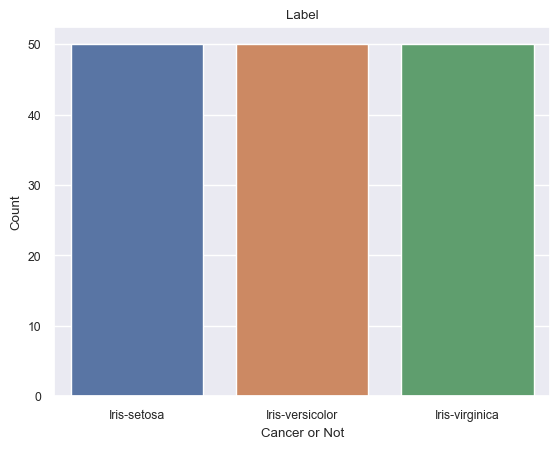

In [55]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="class") # x에 대한 데이터 수 확인
plt.xlabel("Cancer or Not")
plt.ylabel("Count")
plt.title("Label")

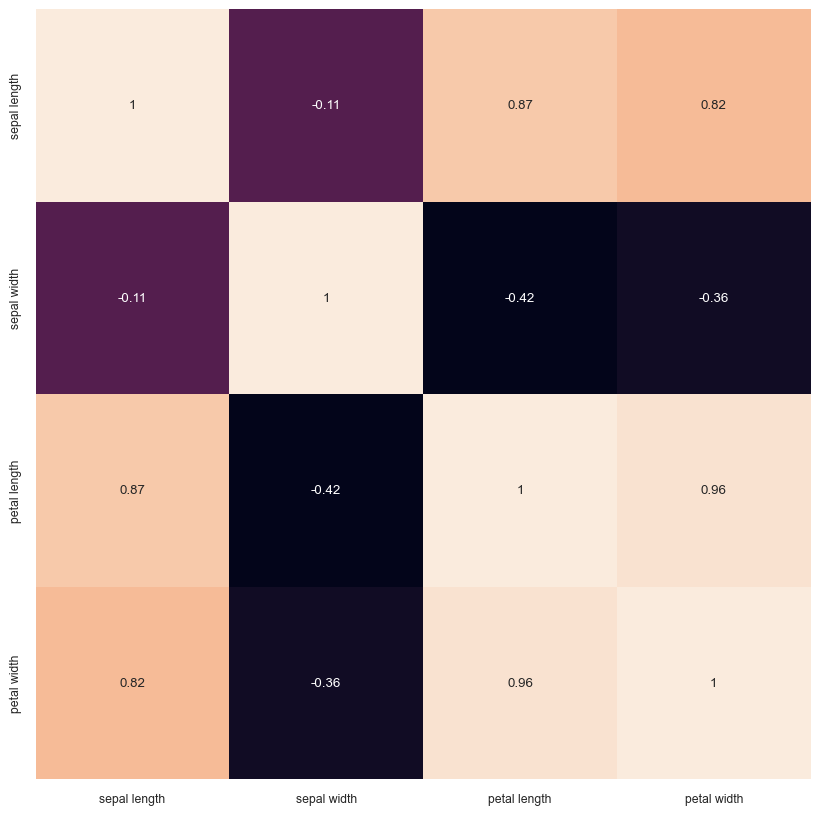

In [56]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [57]:
# 데이터 분류

X=df.drop('class',axis=1)
y=df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)
print(X.head())
print(y.value_counts())

   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64


## < machine learning - calssification >

In [58]:
# classification 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [59]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.9736842105263158
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [60]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.9736842105263158
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [61]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)

pred = rf_clf.predict(X_test)

print ("\n--- Radom Forest ---")
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.9736842105263158
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [62]:
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.9736842105263158
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [63]:
clf_dt = KNeighborsClassifier(n_neighbors=3)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- KNN Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- KNN Classifier ---
0.9736842105263158
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


C:\Users\1563a\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## < machine learning - regression >

In [64]:
# regression

df["class"]=LabelEncoder().fit_transform(df["class"]) ### 회귀 위한 데이터 숫자화


# 데이터 분류

X=df.drop('class',axis=1)
y=df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)
print(X.head())
print(y.value_counts())

   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    50
1    50
2    50
Name: class, dtype: int64


In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

평균제곱근오차 0.06311996089112888


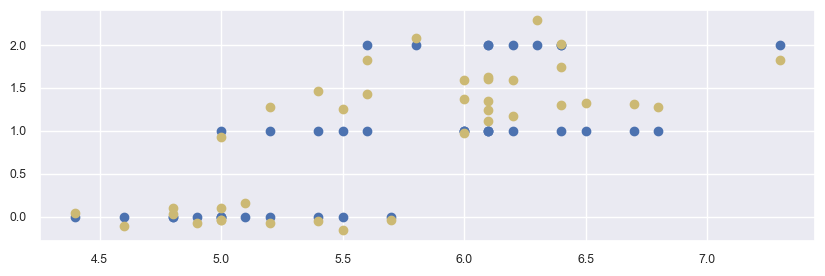

In [66]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,3))
plt.scatter(X_test['sepal length'], y_test, label='y_test')
plt.scatter(X_test['sepal length'], ly_preds, c='y', label='y_pred')
plt.show()         

In [67]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 0.02631578947368421


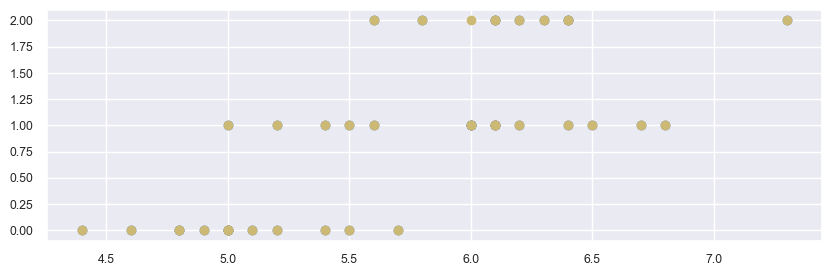

In [68]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,3))
plt.scatter(X_test['sepal length'], y_test, label='y_test')
plt.scatter(X_test['sepal length'], dy_preds, c='y', label='y_pred')
plt.show()         

In [69]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 0.02428157894736842


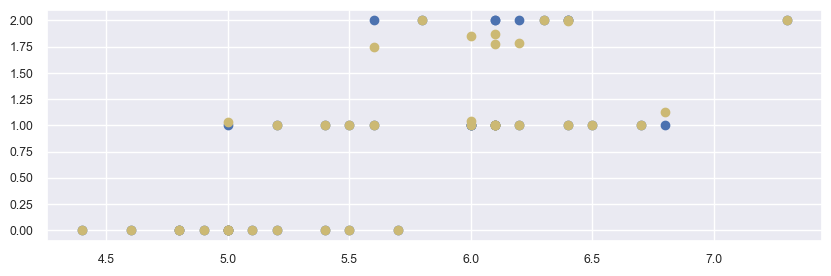

In [70]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,3))
plt.scatter(X_test['sepal length'], y_test, label='y_test')
plt.scatter(X_test['sepal length'], ry_preds, c='y', label='y_pred')
plt.show()         

In [71]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

sv_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 0.02428157894736842


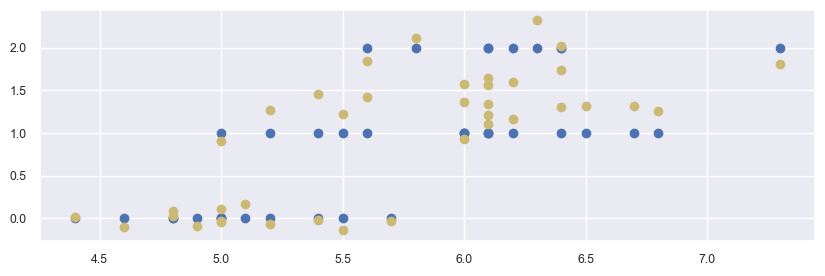

In [72]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,3))
plt.scatter(X_test['sepal length'], y_test, label='y_test')
plt.scatter(X_test['sepal length'], sv_preds, c='y', label='y_pred')
plt.show()         

## < dedp learning - classification >

In [74]:
df = pd.read_csv("C:/ai/breast_cancer.csv", index_col=0)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [77]:
# 결측치 확인

df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [78]:
# 결측치 제거

df = df.dropna()
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [170]:
# 딥러닝 데이터셋
for i in df.columns:
    df[i]=LabelEncoder().fit_transform(df[i])
X=df.drop('label',axis=1).values
y = pd.get_dummies(df['label']).values
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=12)
print(X)
print(y)

[[370   1 455 ... 483 485 506]
 [426 186 486 ... 401 222 375]
 [406 324 478 ... 468 445 361]
 ...
 [340 458 410 ... 317  40 244]
 [429 467 500 ... 482 472 514]
 [  3 414   1 ...   0 272 121]]
[[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [0 1]]


In [171]:
# 딥러닝 모델

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(20,input_shape=(X_train.shape[1],),activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(y_train.shape[1],activation='softmax')) # 분류자

#model.compile(Adam(learning_rate=0.04),'binary_crossentropy',metrics=['accuracy'])
model.compile(Adam(learning_rate=0.02),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

C:\Users\1563a\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_126 (Dense)               │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_127 (Dense)               │ (None, 15)             │           315 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_128 (Dense)               │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_129 (Dense)               │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_130 (Dense)               │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,201 (4.69 KB)

 Trainable params: 1,201 (4.69 KB)

 Non-trainable params: 0 (0.00 B)

In [172]:
# 딥러닝 훈련

model_history=model.fit(x=X_train, y=y_train, epochs=15, batch_size=4,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5799 - loss: 8.1294 - val_accuracy: 0.5789 - val_loss: 0.6829
Epoch 2/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.6201 - loss: 0.6659 - val_accuracy: 0.5789 - val_loss: 0.6893
Epoch 3/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.7075 - loss: 0.6104 - val_accuracy: 0.5789 - val_loss: 0.6785
Epoch 4/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.5945 - loss: 0.6776 - val_accuracy: 0.5789 - val_loss: 0.7152
Epoch 5/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - accuracy: 0.6552 - loss: 0.6506 - val_accuracy: 0.5789 - val_loss: 0.6824
Epoch 6/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.6430 - loss: 0.6555 - val_accuracy: 0.5789 - val_loss: 0.6818
Epoch 7/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.6359 - loss: 0.6577 - val_accuracy: 0.5789 - val_loss: 0.6795
Epoch 8/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.6270 - loss: 0.6625 - va

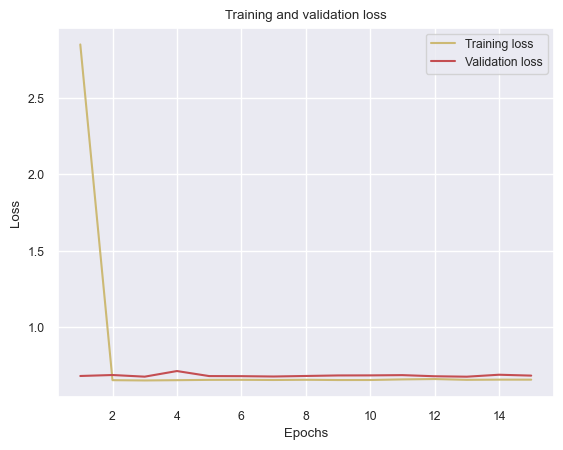

In [173]:
# 딥러닝 결과

import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [174]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.58      1.00      0.73        66

    accuracy                           0.58       114
   macro avg       0.29      0.50      0.37       114
weighted avg       0.34      0.58      0.42       114

[[ 0 48]
 [ 0 66]]


C:\Users\1563a\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\1563a\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\1563a\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## < dedp learning - regression >

In [187]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

input_layer=Input(shape=(X_train.shape[1],))
layer1=Dense(10, activation="relu")(input_layer)
layer2=Dense(20, activation="relu")(layer1)
layer3=Dense(30, activation="relu")(layer2)
layer4=Dense(40, activation="relu")(layer3)
out_layer=Dense(1)(layer3)
model=Model(inputs=input_layer,outputs=out_layer)
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "functional_128"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_29 (InputLayer)     │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_143 (Dense)               │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_144 (Dense)               │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_145 (Dense)               │ (None, 30)             │           630 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_147 (Dense)               │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,191 (4.65 KB)

 Trainable params: 1,191 (4.65 KB)

 Non-trainable params: 0 (0.00 B)

In [188]:
n_epoch=15
history=model.fit(X_train,y_train, epochs=n_epoch, batch_size=4,validation_data= (X_test,y_test))

Epoch 1/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 594.3370 - mse: 594.3454 - val_loss: 34.1266 - val_mse: 34.6488
Epoch 2/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - loss: 14.3425 - mse: 14.3428 - val_loss: 12.5074 - val_mse: 12.7212
Epoch 3/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - loss: 4.1920 - mse: 4.1921 - val_loss: 1.3775 - val_mse: 1.3962
Epoch 4/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - loss: 1.1216 - mse: 1.1216 - val_loss: 1.6151 - val_mse: 1.6352
Epoch 5/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - loss: 0.5088 - mse: 0.5088 - val_loss: 0.8602 - val_mse: 0.8709
Epoch 6/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - loss: 1.3388 - mse: 1.3388 - val_loss: 0.8561 - val_mse: 0.8667
Epoch 7/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - loss: 0.3634 - mse: 0.3634 - val_loss: 0.7751 - val_mse: 0.7843
Epoch 8/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - loss: 0.3030 - mse: 0.3030 - val_loss: 0.7543 - val_mse: 0.7631
Epoch 9/15
114/114 ━━━━━━━━━━━━━

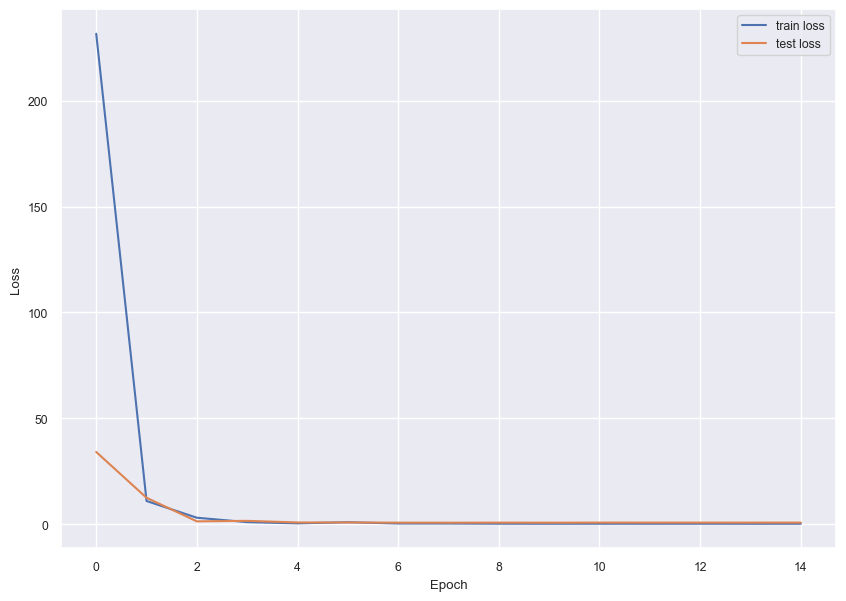

In [189]:
# 딥러닝 결과

import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(n_epoch), history.history['loss'], label='train loss')
plt.plot(range(n_epoch), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [190]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print("test accuracy: ", test_acc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 1.1222 - mse: 1.1464
test accuracy:  0.8028150200843811


## < CNN >

In [199]:
from tensorflow.keras import Input, layers, Model 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Reshape, Conv2D

input_layer=Input(shape=(X_train.shape[1],))
reshaped_input = Reshape((X_train.shape[1], 1, 1))(input_layer)

layer1=layers.Conv2D(16, (1,1),activation="relu")(reshaped_input)

layer2=layers.Conv2D(32, (1,1),activation="relu")(layer1)

layer3=layers.Conv2D(64, (1,1),activation="relu")(layer2)

layer4=layers.Conv2D(128, (1,1),activation="relu")(layer3)

flatten=layers.Flatten()(layer4)
flatten_layer=layers.Dense(32,activation="relu")(flatten)
out_layer=layers.Dense(1)(flatten_layer)

model=Model(inputs=input_layer,outputs=out_layer)
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])
model.summary()

Model: "functional_134"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_32 (InputLayer)     │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 30, 1, 1)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 30, 1, 16)      │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 30, 1, 32)      │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 30, 1, 64)      │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 30, 1, 128)     │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3840)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 32)             │       122,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,953 (523.25 KB)

 Trainable params: 133,953 (523.25 KB)

 Non-trainable params: 0 (0.00 B)

In [200]:
n_epoch=10
history=model.fit(X_train,y_train, epochs=n_epoch, batch_size=4,validation_data= (X_test,y_test))

Epoch 1/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 541.7542 - mse: 541.7601 - val_loss: 1.5209 - val_mse: 1.5339
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.5326 - mse: 8.5327 - val_loss: 0.3088 - val_mse: 0.3098
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3570 - mse: 0.3570 - val_loss: 0.3017 - val_mse: 0.3016
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3370 - mse: 0.3370 - val_loss: 0.2861 - val_mse: 0.2866
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3277 - mse: 0.3277 - val_loss: 0.3803 - val_mse: 0.3823
Epoch 6/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2999 - mse: 0.2999 - val_loss: 0.2698 - val_mse: 0.2694
Epoch 7/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2707 - mse: 0.2707 - val_loss: 0.2594 - val_mse: 0.2594
Epoch 8/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2625 - mse: 0.2625 - val_loss: 0.2584 - val_mse: 0.2581
Epoch 9/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

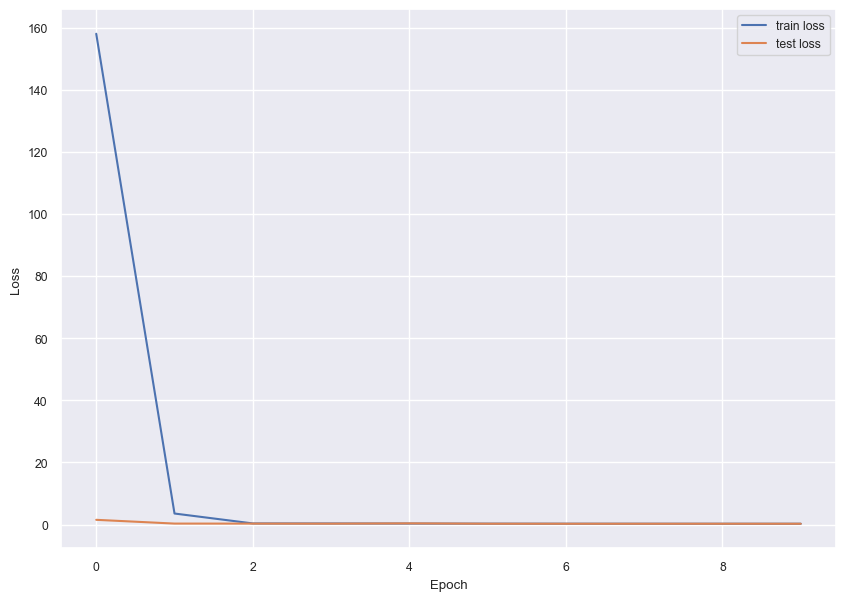

In [202]:
# loss 체크

import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(n_epoch), history.history['loss'], label='train loss')
plt.plot(range(n_epoch), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [203]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print("test accuracy: ", test_acc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2561 - mse: 0.2561 
test accuracy:  0.2560077905654907


## < RNN >

In [206]:
import urllib.request

urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/10.%20RNN%20Text%20Classification/dataset/spam.csv", filename="spam.csv")
data = pd.read_csv('spam.csv', encoding='latin1')
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 5572


In [207]:
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])
print('결측값 여부 :',data.isnull().values.any())
print('v2열의 유니크한 값 :',data['v2'].nunique())
# v2 열에서 중복인 내용이 있다면 중복 제거
data.drop_duplicates(subset=['v2'], inplace=True)
print('총 샘플의 수 :',len(data))

결측값 여부 : True
v2열의 유니크한 값 : 5169
총 샘플의 수 : 5169


In [208]:
X_data = data['v2']
y_data = data['v1']
print('메일 본문의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

메일 본문의 개수: 5169
레이블의 개수: 5169


In [212]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
max_len = 189
X_train_padded = pad_sequences(X_train_encoded, maxlen = max_len)
print("훈련 데이터의 크기(shape):", X_train_padded.shape)

훈련 데이터의 크기(shape): (4135, 189)


In [215]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

embedding_dim = 32
hidden_units = 32
word_to_index = tokenizer.word_index
vocab_size = len(word_to_index) + 1

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train_padded, y_train, epochs=4, batch_size=64, validation_split=0.2)

Epoch 1/4
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 0.8422 - loss: 0.4268 - val_acc: 0.9686 - val_loss: 0.1557
Epoch 2/4
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.9620 - loss: 0.1251 - val_acc: 0.9698 - val_loss: 0.1155
Epoch 3/4
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.9899 - loss: 0.0525 - val_acc: 0.9782 - val_loss: 0.0786
Epoch 4/4
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.9886 - loss: 0.0387 - val_acc: 0.9819 - val_loss: 0.0662


In [216]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9850 - loss: 0.0652

 테스트 정확도: 0.9807


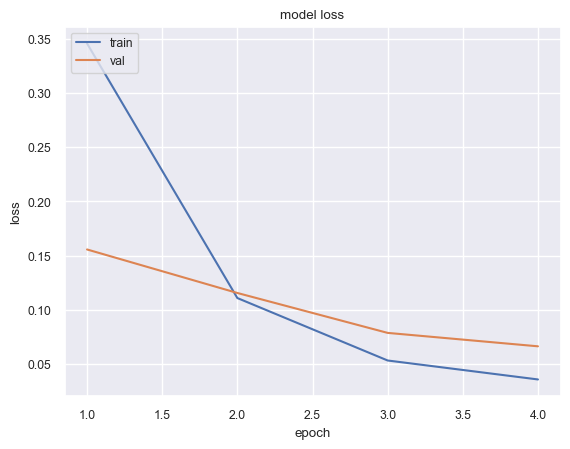

In [217]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## < LSTM >

In [219]:
stock = pd.read_csv("C:/ai/stock.csv")
stock

,일자,종목코드,종목명,거래량,시가,고가,저가,종가
0,20210601,A060310,3S,166690,2890,2970,2885,2920
1,20210601,A095570,AJ네트웍스,63836,5860,5940,5750,5780
2,20210601,A006840,AK홀딩스,103691,35500,35600,34150,34400
3,20210601,A054620,APS,462544,14600,14950,13800,14950
4,20210601,A265520,AP시스템,131987,29150,29150,28800,29050
...,...,...,...,...,...,...,...,...
987995,20230530,A189980,흥국에프엔비,272284,3005,3035,2955,2980
987996,20230530,A000540,흥국화재,50218,3250,3255,3195,3215
987997,20230530,A003280,흥아해운,130664,1344,1395,1340,1370
987998,20230530,A037440,희림,141932,9170,9260,9170,9200


In [221]:
stock.columns = ['Date', 'Code', 'Name', 'Volume', 'Open', 'High', 'Low','Close']
stock_AJ = stock[stock['Code']=='A060310']
stock_AJ = stock_AJ [['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
stock_AJ

,Date,Open,High,Low,Close,Volume
0,20210601,2890,2970,2885,2920,166690
2000,20210602,2915,2975,2830,2900,134833
4000,20210603,2900,2925,2875,2900,144470
6000,20210604,2930,3120,2920,2950,934224
8000,20210607,3000,3150,2955,3150,946560
...,...,...,...,...,...,...
978000,20230523,2300,2315,2260,2285,117084
980000,20230524,2280,2300,2255,2280,67101
982000,20230525,2260,2285,2235,2245,91789
984000,20230526,2245,2915,2230,2910,13590249


In [233]:
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

In [234]:
# 두 데이터를 리스트 형태로 저장
dfx = stock_AJ[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]

X = dfx.values.tolist()
y = dfy.values.tolist()
window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_X.append(_X)
    data_y.append(_y)

In [235]:
print('전체 데이터의 크기 :', len(data_X), len(data_y))

train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

전체 데이터의 크기 : 484 484
훈련 데이터의 크기 : (338, 10, 4) (338, 1)
테스트 데이터의 크기 : (146, 10, 4) (146, 1)


In [256]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RNN
model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=train_X.shape[1:]))
model.add(Dropout(0.1))
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 10, 20)         │         2,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 10, 20)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 20)             │         3,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_163 (Dense)               │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,301 (20.71 KB)

 Trainable params: 5,301 (20.71 KB)

 Non-trainable params: 0 (0.00 B)

In [257]:
n_epoch=70
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse'])
history=model.fit(train_X, train_y, epochs=n_epoch, batch_size=30)
pred_y = model.predict(test_X)

Epoch 1/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2260 - mse: 0.2270
Epoch 2/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0978 - mse: 0.0983 
Epoch 3/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0197 - mse: 0.0196 
Epoch 4/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0169 - mse: 0.0169 
Epoch 5/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0122 - mse: 0.0121 
Epoch 6/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0116 - mse: 0.0116 
Epoch 7/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0118 - mse: 0.0118 
Epoch 8/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0097 - mse: 0.0097 
Epoch 9/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0118 - mse: 0.0118 
Epoch 10/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0108 - mse: 0.0109 
Epoch 11/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0123 - mse: 0.0121 
Epoch 12/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0108 - mse: 0.0109 
Epoch 13/70
12/12 ━━━━━━━━━━━━━━━━━━━━

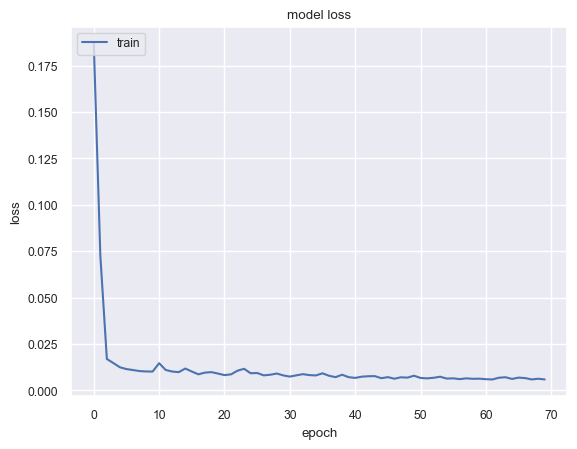

In [258]:
n_epoch=range(n_epoch)
plt.plot(n_epoch, history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [259]:
model.evaluate(test_X, test_y)
y_pred = model.predict(test_X)
mse = tf.reduce_mean(tf.square(test_y - y_pred))

print(f'MSE: {mse.numpy()}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0033 - mse: 0.0031  
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step
MSE: 0.0031925327925553582


## < Pre-trained model >

In [280]:
# model save

base_loss,base_accuracy=model.evaluate(test_X, test_y)

model_file='C:/ai/dataset/Pretrained_Model.h5'
  
tf.keras.models.save_model(model, model_file, include_optimizer=False)
print('model saved at ', model_file)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0033 - mse: 0.0031 


model saved at  C:/ai/dataset/Pretrained_Model.h5
Accuracy >0.319253
Base Loss >0.00


In [281]:
# model load

from tensorflow.keras.models import load_model

base_model = load_model(model_file)
base_model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

base_model.evaluate(test_X, test_y)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0033 - mse: 0.0031  


[0.0035583418793976307, 0.003192533040419221]

In [282]:
# 기존 모델의 층을 동결 (학습되지 않도록 설정)

base_model.trainable = False

In [283]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

def remove_last_layers(model, num_layers_to_remove):
    # 모델의 레이어를 하나씩 슬라이스해서 앞의 레이어만 가져옴
    model_layers = model.layers[:-num_layers_to_remove]  # 마지막 레이어부터 지정된 갯수만큼 제외
    new_model = models.Sequential(model_layers)  # 새로운 모델에 해당 레이어들만 추가
    return new_model

In [296]:
# 출력층부터 1개의 레이어를 삭제
new_model = remove_last_layers(base_model, 1)

# 새로운 출력층 추가
new_model.add(layers.Dense(256, activation='relu'))
new_model.add(layers.Dense(1))  # 예: 10개의 클래스
new_model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

# 모델 요약 출력
new_model.summary()

Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 10, 20)         │         2,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 10, 20)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 20)             │         3,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_170 (Dense)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_171 (Dense)               │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,280 (20.62 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 5,280 (20.62 KB)

In [297]:
history2=new_model.fit(train_X, train_y, epochs=70, batch_size=30, validation_split = 0.1, shuffle = True)

Epoch 1/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0934 - mse: 0.0940 - val_loss: 0.0138 - val_mse: 0.0134
Epoch 2/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0073 - mse: 0.0074 - val_loss: 0.0147 - val_mse: 0.0111
Epoch 3/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0141 - val_mse: 0.0108
Epoch 4/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0138 - val_mse: 0.0106
Epoch 5/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0056 - mse: 0.0057 - val_loss: 0.0184 - val_mse: 0.0111
Epoch 6/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0050 - mse: 0.0051 - val_loss: 0.0151 - val_mse: 0.0102
Epoch 7/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0116 - val_mse: 0.0136
Epoch 8/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0297 - val_mse: 0.0184
Epoch 9/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0067 - mse:

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0061 - mse: 0.0057 
test accuracy:  0.008366592228412628


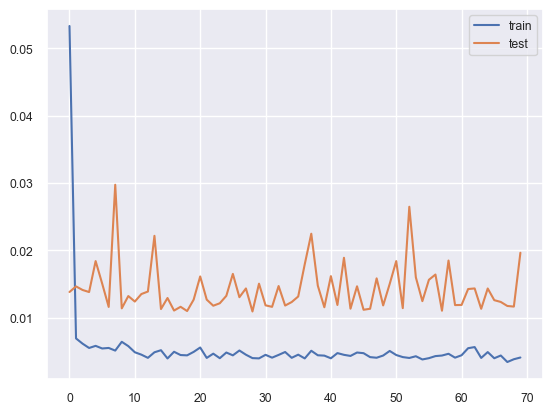

In [298]:
plt.plot(history2.history["loss"], label = "train")
plt.plot(history2.history["val_loss"], label = "test")
plt.legend()

test_loss, test_acc = new_model.evaluate(test_X, test_y)
print("test accuracy: ", test_acc)

In [299]:
stock_AJ = stock[stock['Code']=='A095570']
stock_AJ = stock_AJ [['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
stock_AJ

,Date,Open,High,Low,Close,Volume
1,20210601,5860,5940,5750,5780,63836
2001,20210602,5840,5840,5750,5800,39320
4001,20210603,5800,5800,5650,5720,78440
6001,20210604,5720,5720,5420,5570,198246
8001,20210607,5650,5660,5370,5420,167712
...,...,...,...,...,...,...
978001,20230523,4430,4445,4405,4430,83616
980001,20230524,4430,4515,4380,4450,251478
982001,20230525,4450,4490,4400,4415,83314
984001,20230526,4445,4445,4320,4325,206735


In [300]:
# 두 데이터를 리스트 형태로 저장
dfx = stock_AJ[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]

X = dfx.values.tolist()
y = dfy.values.tolist()
window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_X.append(_X)
    data_y.append(_y)

In [301]:
print('전체 데이터의 크기 :', len(data_X), len(data_y))

train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

전체 데이터의 크기 : 484 484
훈련 데이터의 크기 : (338, 10, 4) (338, 1)
테스트 데이터의 크기 : (146, 10, 4) (146, 1)


In [302]:
# 출력층부터 1개의 레이어를 삭제
new_model = remove_last_layers(base_model, 1)

# 새로운 출력층 추가
new_model.add(layers.Dense(256, activation='relu'))
new_model.add(layers.Dense(1))  # 예: 10개의 클래스
new_model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

# 모델 요약 출력
new_model.summary()

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 10, 20)         │         2,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 10, 20)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 20)             │         3,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_172 (Dense)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_173 (Dense)               │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,280 (20.62 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 5,280 (20.62 KB)

In [303]:
history3=new_model.fit(train_X, train_y, epochs=70, batch_size=30, validation_split = 0.1, shuffle = True)

Epoch 1/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1330 - mse: 0.1336 - val_loss: 0.0147 - val_mse: 0.0166
Epoch 2/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0102 - mse: 0.0103 - val_loss: 0.0144 - val_mse: 0.0132
Epoch 3/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0134 - val_mse: 0.0136
Epoch 4/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0080 - mse: 0.0078 - val_loss: 0.0260 - val_mse: 0.0147
Epoch 5/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0122 - val_mse: 0.0141
Epoch 6/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0144 - val_mse: 0.0103
Epoch 7/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0048 - mse: 0.0047 - val_loss: 0.0118 - val_mse: 0.0128
Epoch 8/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0053 - mse: 0.0052 - val_loss: 0.0146 - val_mse: 0.0102
Epoch 9/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0049 - mse:

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0036 - mse: 0.0034 
test accuracy:  0.004882059991359711


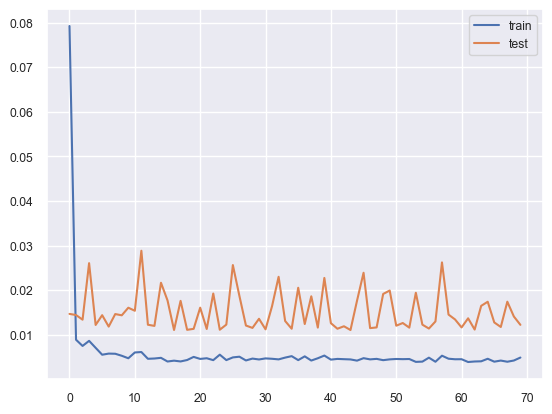

In [305]:
plt.plot(history3.history["loss"], label = "train")
plt.plot(history3.history["val_loss"], label = "test")
plt.legend()

test_loss, test_acc = new_model.evaluate(test_X, test_y)
print("test accuracy: ", test_acc)

## < PCA >

In [306]:
# 데이터 불러오기 (csv, xlsx)

df = pd.read_csv("C:/ai/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [322]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

# 데이터에서 독립 변수(Outcome 제외)를 추출
X = df.drop('Outcome', axis=1)

X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)
for i in range(5):
    # LabelEncoder 객체 생성
    label_encoder = LabelEncoder()
    # 'label' 컬럼을 숫자로 변환
    X_pca[:,i] = LabelEncoder().fit_transform(X_pca[:,i])

In [323]:
# 축소된 데이터 복원 (원래 차원으로 복원)
X_reconstructed = pca.inverse_transform(X_pca)

# 원본 데이터와 복원된 데이터 비교 (MSE 계산)
mse = mean_squared_error(X_scaled, X_reconstructed)
print("mse: ",mse)

mse:  122344.42320683316


In [324]:
df_e=df.copy()
for i in df.columns:
    # LabelEncoder 객체 생성
    label_encoder = LabelEncoder()
    # 'label' 컬럼을 숫자로 변환
    df_e[i] = LabelEncoder().fit_transform(df[i])
df_e

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,86,22,28,0,123,350,29,1
1,1,23,19,22,0,62,196,10,0
2,8,121,17,0,0,30,368,11,1
3,1,27,19,16,62,77,53,0,0
4,0,75,4,28,102,209,514,12,1
...,...,...,...,...,...,...,...,...,...
763,10,39,25,41,108,118,55,42,0
764,2,60,21,20,0,155,187,6,0
765,5,59,22,16,71,58,115,9,0
766,1,64,14,0,0,95,195,26,1


In [325]:
X=df_e.drop('Outcome',axis=1).values
y=pd.get_dummies(df_e['Outcome']).values
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_pca, y,test_size=0.25,random_state=0)

In [326]:
# 딥러닝 모델

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(15,input_shape=(X_train.shape[1],),activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(5,activation='sigmoid'))
model.add(Dense(y_train.shape[1],activation='softmax'))

#model.compile(Adam(learning_rate=0.02),'binary_crossentropy',metrics=['accuracy'])
model.compile(Adam(learning_rate=0.002),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

C:\Users\1563a\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_190 (Dense)               │ (None, 15)             │           135 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_191 (Dense)               │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_192 (Dense)               │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_193 (Dense)               │ (None, 2)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 362 (1.41 KB)

 Trainable params: 362 (1.41 KB)

 Non-trainable params: 0 (0.00 B)

In [327]:
# 딥러닝 훈련

model_history=model.fit(x=X_train, y=y_train, epochs=20, batch_size=4,validation_split=0.1)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6426 - loss: 0.6576 - val_accuracy: 0.6724 - val_loss: 0.6305
Epoch 2/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.6362 - loss: 0.6563 - val_accuracy: 0.6724 - val_loss: 0.6289
Epoch 3/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.6224 - loss: 0.6588 - val_accuracy: 0.6724 - val_loss: 0.6230
Epoch 4/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.6351 - loss: 0.6498 - val_accuracy: 0.6724 - val_loss: 0.6237
Epoch 5/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.6473 - loss: 0.6360 - val_accuracy: 0.6724 - val_loss: 0.6217
Epoch 6/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.6404 - loss: 0.6338 - val_accuracy: 0.6724 - val_loss: 0.6131
Epoch 7/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.6094 - loss: 0.6477 - val_accuracy: 0.6724 - val_loss: 0.6089
Epoch 8/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.6092 - loss: 0.6412 - va

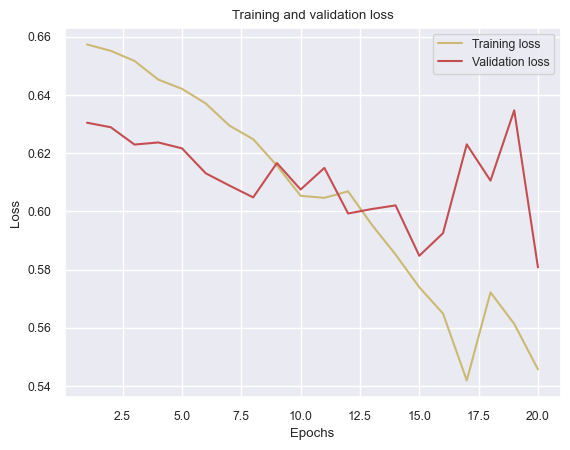

In [328]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [329]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76       130
           1       0.50      0.48      0.49        62

    accuracy                           0.68       192
   macro avg       0.63      0.63      0.63       192
weighted avg       0.67      0.68      0.68       192

[[100  30]
 [ 32  30]]


In [332]:
# 딥러닝 모델

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(15,input_shape=(X_train_p.shape[1],),activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(5,activation='sigmoid'))
model.add(Dense(y_train_p.shape[1],activation='softmax'))

#model.compile(Adam(learning_rate=0.02),'binary_crossentropy',metrics=['accuracy'])
model.compile(Adam(learning_rate=0.002),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_198 (Dense)               │ (None, 15)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_199 (Dense)               │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_200 (Dense)               │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_201 (Dense)               │ (None, 2)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 317 (1.24 KB)

 Trainable params: 317 (1.24 KB)

 Non-trainable params: 0 (0.00 B)

In [333]:
# 딥러닝 훈련

model_history2=model.fit(x=X_train_p, y=y_train_p, epochs=20, batch_size=4,validation_split=0.1)
y_pred_p = model.predict(X_test_p)

y_test_class_p = np.argmax(y_test_p,axis=1)
y_pred_class_p = np.argmax(y_pred_p,axis=1)

Epoch 1/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4821 - loss: 0.7023 - val_accuracy: 0.6724 - val_loss: 0.6307
Epoch 2/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.6385 - loss: 0.6523 - val_accuracy: 0.6724 - val_loss: 0.6262
Epoch 3/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.6509 - loss: 0.6432 - val_accuracy: 0.6724 - val_loss: 0.6298
Epoch 4/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.6301 - loss: 0.6538 - val_accuracy: 0.6724 - val_loss: 0.6232
Epoch 5/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.6187 - loss: 0.6609 - val_accuracy: 0.6724 - val_loss: 0.6188
Epoch 6/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.6600 - loss: 0.6330 - val_accuracy: 0.6724 - val_loss: 0.6148
Epoch 7/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.6112 - loss: 0.6505 - val_accuracy: 0.6724 - val_loss: 0.6072
Epoch 8/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.6510 - loss: 0.6356 - va

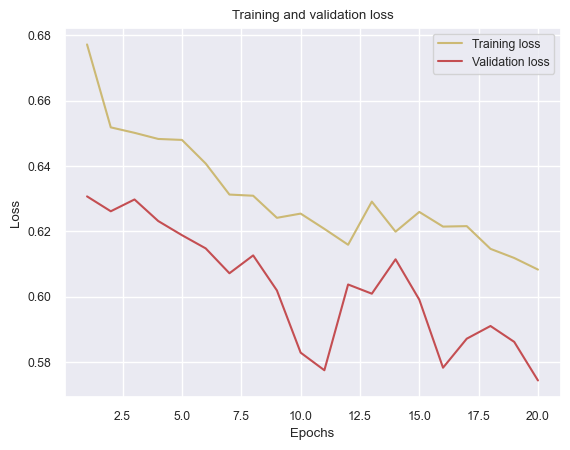

In [334]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history2.history['loss']
val_loss =model_history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [335]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76       130
           1       0.50      0.48      0.49        62

    accuracy                           0.68       192
   macro avg       0.63      0.63      0.63       192
weighted avg       0.67      0.68      0.68       192

[[100  30]
 [ 32  30]]


## < Transformer >

In [351]:
# 데이터 불러오기 (csv, xlsx)

df = pd.read_csv("C:/ai/DSA_features.csv")
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [352]:
for i in df.columns:
    # LabelEncoder 객체 생성
    label_encoder = LabelEncoder()
    # 'label' 컬럼을 숫자로 변환
    df[i] = LabelEncoder().fit_transform(df[i])
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,1824,1201,6229,2129,2129,2972,8548,3588,8343,1646,...,674,6839,3211,1960,4164,877,877,5593,12,0
1,1829,1206,6365,2027,2027,5743,8590,3641,8362,530,...,814,2752,3207,1961,4154,912,912,7434,12,0
2,1819,1179,6364,1674,1674,3636,8591,3640,8368,227,...,578,4013,3214,1969,4172,774,774,5657,12,0
3,1793,1184,6240,1769,1769,1969,8606,3853,8366,1632,...,459,5532,3248,2002,4205,1016,1016,6906,12,0
4,1768,1194,6354,1311,1311,9052,8632,3717,8378,372,...,742,3889,3262,2007,4215,886,886,7001,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,2172,6784,1403,7972,7972,8502,1765,8300,390,8908,...,7907,4951,6862,8180,3669,8798,8798,2887,1,7
9116,7405,7298,1247,8057,8057,9105,6651,7938,383,8108,...,6255,2928,6063,7189,2863,8683,8683,945,1,7
9117,7464,6452,1740,8153,8153,5305,3110,7080,1089,8153,...,9006,5238,1772,3130,1070,8389,8389,8299,1,7
9118,8146,7476,1433,8208,8208,9118,3545,7811,896,7908,...,6510,5814,8280,7988,5296,7829,7829,137,1,7


In [353]:
X=df.drop('activity',axis=1)
y=df['activity']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)
X_train = np.expand_dims(X_train, axis=-1)
print(X.shape)
print(y.shape)

(9120, 271)
(9120,)


In [354]:
from keras import layers
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(res)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    return x + res

In [355]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_last")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(1)(x)
    return keras.Model(inputs, outputs)

In [356]:
print(X_train.shape[1:])

(271, 1)


In [357]:
#input_shape = X_train_padded.shape
input_shape = X_train.shape[1:]
#input_shape = (X_train.shape[1],1)
print("input: {}".format(input_shape))

model = build_model(
    input_shape,
    head_size=16,
    num_heads=3,
    ff_dim=3,
    num_transformer_blocks=3,
    mlp_units=[32],
    mlp_dropout=0.2,
    dropout=0.1,)

model.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["categorical_accuracy"],)
model.summary()

input: (271, 1)


Model: "functional_258"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_58      │ (None, 271, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 271, 1)    │        337 │ input_layer_58[0… │
│ (MultiHeadAttentio… │                   │            │ input_layer_58[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_41          │ (None, 271, 1)    │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 271, 1)    │          2 │ dropout_41[0][0]  │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_13 (Add)        │ (None, 271, 1)    │          0 │ layer_normalizat… │
│                     │                   │            │ input_layer_58[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_13 (Conv1D)  │ (None, 271, 3)    │          6 │ add_13[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_42          │ (None, 271, 3)    │          0 │ conv1d_13[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_14 (Conv1D)  │ (None, 271, 1)    │          4 │ dropout_42[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 271, 1)    │          2 │ conv1d_14[0][0]   │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_14 (Add)        │ (None, 271, 1)    │          0 │ layer_normalizat… │
│                     │                   │            │ add_13[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 271, 1)    │        337 │ add_14[0][0],     │
│ (MultiHeadAttentio… │                   │            │ add_14[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_44          │ (None, 271, 1)    │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 271, 1)    │          2 │ dropout_44[0][0]  │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_15 (Add)        │ (None, 271, 1)    │          0 │ layer_normalizat… │
│                     │                   │            │ add_14[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_15 (Conv1D)  │ (None, 271, 3)    │          6 │ add_15[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_45          │ (None, 271, 3)    │          0 │ conv1d_15[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_16 (Conv1D)  │ (None, 271, 1)    │          4 │ dropout_45[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 271, 1)    │          2 │ conv1d_16[0][0]   │
│ (LayerNormalizatio… │                   │            │                 

 Total params: 1,150 (4.49 KB)

 Trainable params: 1,150 (4.49 KB)

 Non-trainable params: 0 (0.00 B)

In [359]:
callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
#X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1) ### 보정
#y_train = np.argmax(y_train, axis=1) ### 보정

model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=256,
    callbacks=callbacks,
)

Epoch 1/10


C:\Users\1563a\anaconda3\lib\site-packages\keras\src\losses\losses.py:22: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - categorical_accuracy: 1.0000 - loss: 1.0830e-06 - val_categorical_accuracy: 1.0000 - val_loss: 1.0693e-06
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - categorical_accuracy: 1.0000 - loss: 1.0852e-06 - val_categorical_accuracy: 1.0000 - val_loss: 1.0693e-06
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - categorical_accuracy: 1.0000 - loss: 1.0801e-06 - val_categorical_accuracy: 1.0000 - val_loss: 1.0693e-06
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - categorical_accuracy: 1.0000 - loss: 1.0824e-06 - val_categorical_accuracy: 1.0000 - val_loss: 1.0693e-06
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - categorical_accuracy: 1.0000 - loss: 1.0862e-06 - val_categorical_accuracy: 1.0000 - val_loss: 1.0693e-06
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - categorical_accuracy: 1.0000 - loss: 1.0778e-06 - val_categorical_accuracy: 1.0000 - val_loss: 1.0693e-06
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - categorical

In [360]:
X_test = np.expand_dims(X_test, axis=-1)
model.evaluate(X_test, y_test, verbose=1)

72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - categorical_accuracy: 1.0000 - loss: 1.0565e-06


[1.0547229294388671e-06, 1.0]

## < AE >

In [452]:
# 데이터 불러오기 (csv, xlsx)

df = pd.read_csv("C:/ai/DSA_features.csv")
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [453]:
RANDOM_SEED = 42
X_train, X_test = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED)

In [463]:
print(len(df['activity'].unique()))
print(df['activity'].unique())

19
['sitting' 'standing' 'lyingBack' 'lyingRigh' 'ascendingStairs'
 'decendingStairs' 'standingInElevatorStill' 'movingInElevator'
 'walkingLot' 'walkingTreadmillFlat' 'walkingTreadmillIncline'
 'runningTreadmill' 'stepper' 'crossTrainer' 'cyclingHorizontal'
 'cyclingVertical' 'rowing' 'jumping' 'basketBall']


In [455]:
#'lyingBack', 'lyingRigh'
X_train = X_train[X_train['activity'].isin(['lyingBack', 'lyingRigh'])]

for i in ['activity','people']:
    label_encoder = LabelEncoder()
    X_train[i] = LabelEncoder().fit_transform(X_train[i])
    X_test[i] = LabelEncoder().fit_transform(X_test[i])
    
X_train = X_train.drop(['activity'], axis=1).values

y_test = X_test['activity']
X_test = X_test.drop(['activity'], axis=1).values
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(755, 271)
(1824, 271)
(1824,)


In [458]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# 오토인코더 모델 (대칭형)

encoding_dim = 24  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(X_train.shape[1],))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
encoded = Dense(int(encoding_dim / 3), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 3), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(X_train.shape[1], activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

# 모델 요약 출력
autoencoder.summary()

Model: "functional_306"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_82 (InputLayer)     │ (None, 271)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_360 (Dense)               │ (None, 24)             │         6,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_361 (Dense)               │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_362 (Dense)               │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_364 (Dense)               │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_365 (Dense)               │ (None, 271)            │         3,523 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,563 (41.26 KB)

 Trainable params: 10,563 (41.26 KB)

 Non-trainable params: 0 (0.00 B)

In [459]:
history = autoencoder.fit(X_train, X_train, 
                          epochs=20, 
                          batch_size=4, 
                          shuffle=True, 
                          validation_split = 0.1)

Epoch 1/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 893us/step - loss: 5.7151 - val_loss: 6.1925
Epoch 2/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - loss: 5.5860 - val_loss: 5.8860
Epoch 3/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - loss: 5.2572 - val_loss: 5.5819
Epoch 4/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - loss: 5.0057 - val_loss: 5.4669
Epoch 5/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - loss: 4.9759 - val_loss: 5.4457
Epoch 6/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - loss: 4.9568 - val_loss: 5.4391
Epoch 7/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - loss: 4.8946 - val_loss: 5.4343
Epoch 8/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - loss: 4.9269 - val_loss: 5.4300
Epoch 9/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - loss: 4.8864 - val_loss: 5.4254
Epoch 10/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - loss: 4.9081 - val_loss: 5.4200
Epoch 11/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - loss: 4.8794 - val_loss: 5.4160
Epoch 12/20
170/170 ━━━━━━━━━━

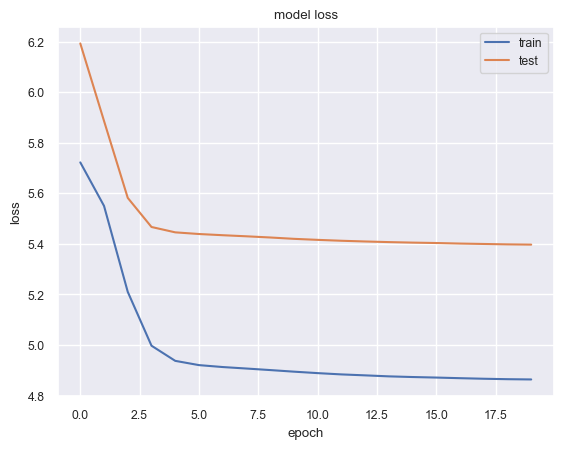

In [460]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [461]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step


,reconstruction_error,true_class
count,1824.000000,1824.000000
mean,81.172053,9.074013
std,205.075039,5.487282
min,4.557893,0.000000
25%,5.363449,4.000000
50%,11.589587,9.000000
75%,23.588853,14.000000
max,2032.519636,18.000000


In [462]:
error_df.head()

,reconstruction_error,true_class
8225,48.043812,6
3133,4.931151,14
1446,4.933618,8
4568,43.384571,17
6022,8.898940,15


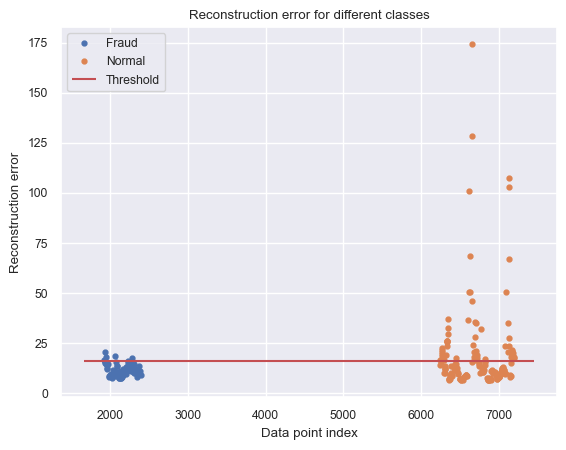

In [520]:
# threshold 값을 조정하여 최선의 정확도를 얻음, 그래프로를 보고 결정

threshold = 16

#groups = error_df.groupby('true_class')
error_df=error_df[error_df['true_class'].isin([0, 2, 3])]
error_df['true_class'] = error_df['true_class'].replace({2: 1, 3: 1})
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 0 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [521]:
y_pred = [1 if e > threshold else 0 for e in error_df[error_df['true_class'].isin([0, 1])].reconstruction_error.values]
print(classification_report(error_df[error_df['true_class'].isin([0, 1])].true_class, y_pred))
#print(classification_report(error_df.true_class, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.95      0.60        94
           1       0.92      0.34      0.49       173

    accuracy                           0.55       267
   macro avg       0.68      0.64      0.54       267
weighted avg       0.75      0.55      0.53       267



In [553]:
# Denosing
df_denoise = df.copy()
df_noise = df.copy()
noise_factor = 0.5

for i in ['people']:
    label_encoder = LabelEncoder()
    df_denoise[i] = LabelEncoder().fit_transform(df_denoise[i])
    df_noise[i] = LabelEncoder().fit_transform(df_noise[i])

for i in df.columns:
    if not i=="activity":
        noise = noise_factor * np.random.normal(loc=0.0, scale=1.0, size=len(df[i]))
        df_noise[i] += noise

print(df_denoise.values)
print(df_noise.values)

[[7.975714399999999 8.1605 7.6823 ... 0.036728963831605 'sitting' 0]
 [7.978249600000001 8.1763 7.8472 ... 0.34747102652112 'sitting' 0]
 [7.970893599999999 8.086 7.847 ... 0.0455789433658793 'sitting' 0]
 ...
 [9.599112887999995 27.93 -1.0765 ... 0.6684382188037419 'basketBall' 7]
 [9.692482224 72.782 -2.6734 ... -1.482488998951602 'basketBall' 7]
 [9.380640912000002 45.009 -3.5938 ... -0.2233022030386714 'basketBall' 7]]
[[8.296649931864215 7.620860557317567 8.47605129890825 ...
  -0.9000734240289543 'sitting' 0.3621894992855367]
 [7.606531983470093 8.518681311573376 7.06641824081872 ...
  0.16710014644500995 'sitting' -0.4746449783810728]
 [8.047173006189535 7.0559219490177645 7.791833218960031 ...
  0.015549562852208022 'sitting' 0.07669486798263926]
 ...
 [9.681075062491528 27.383664292393743 -0.6248980981032172 ...
  0.4500506020848756 'basketBall' 7.736260337686916]
 [9.974328864661453 73.19077364580136 -2.4023963357960283 ...
  -0.9590894990270578 'basketBall' 7.306609872612276

In [554]:
RANDOM_SEED = 42
X_train, X_test = train_test_split(df_noise, test_size=0.2, random_state=RANDOM_SEED)

X_train = X_train[X_train['activity'].isin(['lyingBack', 'lyingRigh'])]

for i in ['activity']:
    label_encoder = LabelEncoder()
    X_train[i] = LabelEncoder().fit_transform(X_train[i])
    X_test[i] = LabelEncoder().fit_transform(X_test[i])
    
X_train = X_train.drop(['activity'], axis=1).values

y_test = X_test['activity']
X_test = X_test.drop(['activity'], axis=1).values
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(755, 271)
(1824, 271)
(1824,)


In [555]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# 오토인코더 모델 (비대칭형)

encoding_dim = 60  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(X_train.shape[1],))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
encoded = Dense(int(encoding_dim / 4), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 5), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 3), activation='relu')(encoded)
decoded = Dense(X_train.shape[1], activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

# 모델 요약 출력
autoencoder.summary()

Model: "functional_314"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_86 (InputLayer)     │ (None, 271)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_384 (Dense)               │ (None, 60)             │        16,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_385 (Dense)               │ (None, 30)             │         1,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_386 (Dense)               │ (None, 15)             │           465 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_388 (Dense)               │ (None, 20)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_389 (Dense)               │ (None, 271)            │         5,691 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,626 (96.20 KB)

 Trainable params: 24,626 (96.20 KB)

 Non-trainable params: 0 (0.00 B)

In [556]:
history = autoencoder.fit(X_train, X_train, 
                          epochs=20, 
                          batch_size=4, 
                          shuffle=True, 
                          validation_split = 0.1)

Epoch 1/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 900us/step - loss: 5.9292 - val_loss: 6.2665
Epoch 2/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - loss: 5.5892 - val_loss: 5.8597
Epoch 3/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - loss: 5.2774 - val_loss: 5.7689
Epoch 4/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - loss: 5.2224 - val_loss: 5.7349
Epoch 5/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - loss: 5.1567 - val_loss: 5.7090
Epoch 6/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - loss: 5.1419 - val_loss: 5.6955
Epoch 7/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - loss: 5.1328 - val_loss: 5.6830
Epoch 8/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - loss: 5.0775 - val_loss: 5.6773
Epoch 9/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - loss: 5.1395 - val_loss: 5.6747
Epoch 10/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - loss: 5.0968 - val_loss: 5.6734
Epoch 11/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - loss: 5.1126 - val_loss: 5.6725
Epoch 12/20
170/170 ━━━━━━━━━━

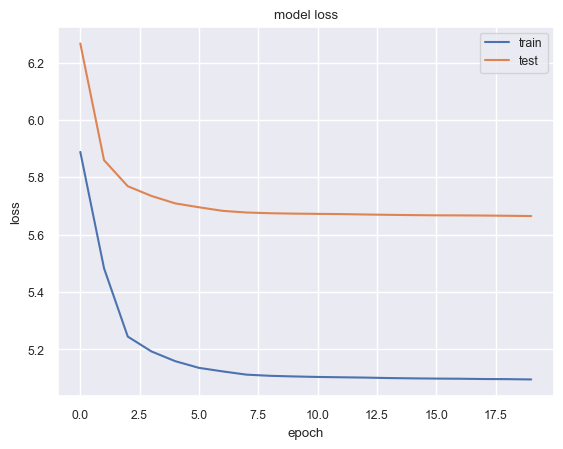

In [557]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [558]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step


,reconstruction_error,true_class
count,1824.000000,1824.000000
mean,81.376780,9.074013
std,205.041935,5.487282
min,4.580349,0.000000
25%,5.680895,4.000000
50%,11.855725,9.000000
75%,23.825248,14.000000
max,2031.676260,18.000000


In [559]:
error_df.head()

,reconstruction_error,true_class
8225,48.070774,6
3133,5.403616,14
1446,5.163618,8
4568,43.650837,17
6022,9.168363,15


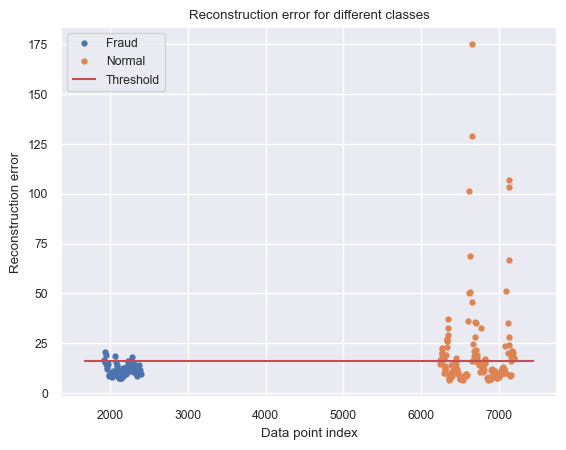

In [570]:
# threshold 값을 조정하여 최선의 정확도를 얻음, 그래프로를 보고 결정

threshold = 16

#groups = error_df.groupby('true_class')
#error_df=error_df[error_df['true_class'].isin([0, 2, 3])]
#error_df['true_class'] = error_df['true_class'].replace({2: 1, 3: 1})
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 0 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [571]:
y_pred = [1 if e > threshold else 0 for e in error_df[error_df['true_class'].isin([0, 1])].reconstruction_error.values]
print(classification_report(error_df[error_df['true_class'].isin([0, 1])].true_class, y_pred))
#print(classification_report(error_df.true_class, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.94      0.59        94
           1       0.91      0.34      0.50       173

    accuracy                           0.55       267
   macro avg       0.67      0.64      0.55       267
weighted avg       0.74      0.55      0.53       267

